In [1]:
import pandas as pd

df_2019 = pd.read_csv('./data/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20190701000000.csv', names = ['광역시도명', '시군구명', '날짜', '시간대별_시간', '강수_유형명', '습도_값', '강수량_값', '기온_값', '풍속_값', '바람강도_유형명', '동쪽서쪽바람_유형명', '풍향_값', '풍향_카테고리명', '한식_배달건수', '분식_배달건수', '카페/디저트_배달건수', '돈까스/일식_배달건수', '회_배달건수', '치킨_배달건수', '피자_배달건수', '아시안/양식_배달건수', '중식_배달건수', '족발/보쌈_배달건수', '야식_배달건수', '찜탕_배달건수', '도시락_배달건수', '패스트푸드_배달건수'])
df_20200106 = pd.read_csv('./data/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200101000000.csv', names = ['광역시도명', '시군구명', '날짜', '시간대별_시간', '강수_유형명', '습도_값', '강수량_값', '기온_값', '풍속_값', '바람강도_유형명', '동쪽서쪽바람_유형명', '풍향_값', '풍향_카테고리명', '한식_배달건수', '분식_배달건수', '카페/디저트_배달건수', '돈까스/일식_배달건수', '회_배달건수', '치킨_배달건수', '피자_배달건수', '아시안/양식_배달건수', '중식_배달건수', '족발/보쌈_배달건수', '야식_배달건수', '찜탕_배달건수', '도시락_배달건수', '패스트푸드_배달건수'])
df_202007 =  pd.read_csv('./data/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200701000000.csv', names = ['광역시도명', '시군구명', '날짜', '시간대별_시간', '강수_유형명', '습도_값', '강수량_값', '기온_값', '풍속_값', '바람강도_유형명', '동쪽서쪽바람_유형명', '풍향_값', '풍향_카테고리명', '한식_배달건수', '분식_배달건수', '카페/디저트_배달건수', '돈까스/일식_배달건수', '회_배달건수', '치킨_배달건수', '피자_배달건수', '아시안/양식_배달건수', '중식_배달건수', '족발/보쌈_배달건수', '야식_배달건수', '찜탕_배달건수', '도시락_배달건수', '패스트푸드_배달건수'])

def preprocessing(df):
    del df['습도_값']
    del df['강수량_값']
    del df['기온_값']
    del df['풍속_값']
    del df['바람강도_유형명']
    del df['동쪽서쪽바람_유형명']
    del df['풍향_값']
    del df['풍향_카테고리명']
    del df['시간대별_시간']
    df['날짜'] = pd.to_datetime(df['날짜'])
    df['총_배달건수'] = df.iloc[:,5:].sum(axis = 1)
    return df

df_2019 = preprocessing(df_2019);  df_20200106 = preprocessing(df_20200106); df_202007 = preprocessing(df_202007)

In [2]:
df = pd.concat([df_2019, df_20200106, df_202007], axis = 0)

In [3]:
# 경기도만 필터링
ggd = df[df['광역시도명']=='경기도']
ggd = ggd.sort_values('날짜')

In [4]:
import pandas as pd

# "없음"인 날짜에 대한 데이터 필터링
no_rain_data = ggd[ggd['강수_유형명'] == '없음']

# "비"인 날짜에 대한 데이터 필터링
rain_data = ggd[ggd['강수_유형명'] == '비']

# "없음"과 "비"가 동시에 발생하는 날짜에 대한 데이터 필터링
mixed_data = ggd[ggd['강수_유형명'].isin(['없음', '비','눈','진눈개비'])]

# "없음"만 있는 날짜 가져오기
no_rain_dates = no_rain_data['날짜'].unique()

# "비"만 있는 날짜 가져오기
rain_dates = rain_data['날짜'].unique()

# "없음"과 "비"가 동시에 발생하는 날짜에 대한 날씨 분류를 "비"로 업데이트
mixed_data.loc[mixed_data['날짜'].isin(no_rain_dates), '강수_유형명'] = '비'

# 날씨 분류를 위한 새로운 열 생성
ggd['날씨_분류'] = ggd['강수_유형명']

# "없음"과 "비"만 있는 날짜에 대한 날씨 분류 업데이트
ggd.loc[ggd['날짜'].isin(no_rain_dates), '날씨_분류'] = '없음'
ggd.loc[ggd['날짜'].isin(rain_dates), '날씨_분류'] = '비'

# "없음"인 날짜에 대한 데이터 필터링
no_rain_data = ggd[ggd['날씨_분류'] == '없음']

# "비"인 날짜에 대한 데이터 필터링
rain_data = ggd[ggd['날씨_분류'] == '비']

del no_rain_data['강수_유형명']
del rain_data['강수_유형명']
del no_rain_data['날씨_분류']
del rain_data['날씨_분류']

In [5]:
len(rain_data['날짜'].unique()) # 비 온 날짜 총 150일

150

In [7]:
len(no_rain_data['날짜'].unique()) # 맑은 날짜 총 246일

246

In [8]:
import pandas as pd

# "비"인 날짜의 배달 주문량을 일별 합계로 계산
rain_daily_sum = rain_data.groupby('날짜').sum().mean()
rain_daily_sum_df = pd.DataFrame(rain_daily_sum, columns=['평균_배달건수'])
rain_daily_sum_df.reset_index(inplace=True)
rain_daily_sum_df

C:\Users\user\AppData\Local\Temp\ipykernel_22508\826847790.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rain_daily_sum = rain_data.groupby('날짜').sum().mean()


,index,평균_배달건수
0,한식_배달건수,2130.060000
1,분식_배달건수,1755.360000
2,카페/디저트_배달건수,1166.980000
3,돈까스/일식_배달건수,811.480000
4,회_배달건수,353.006667
5,치킨_배달건수,3357.166667
6,피자_배달건수,766.446667
7,아시안/양식_배달건수,375.653333
8,중식_배달건수,440.413333
9,족발/보쌈_배달건수,1720.860000


In [9]:
import pandas as pd

# "없음"인 날짜의 배달 주문량을 일별 합계로 계산
no_rain_daily_sum = no_rain_data.groupby('날짜').sum().mean()
no_rain_daily_sum_df = pd.DataFrame(no_rain_daily_sum, columns=['평균_배달건수'])
no_rain_daily_sum_df.reset_index(inplace=True)
no_rain_daily_sum_df


C:\Users\user\AppData\Local\Temp\ipykernel_22508\2908266105.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  no_rain_daily_sum = no_rain_data.groupby('날짜').sum().mean()


,index,평균_배달건수
0,한식_배달건수,2015.101626
1,분식_배달건수,1654.065041
2,카페/디저트_배달건수,1168.186992
3,돈까스/일식_배달건수,816.658537
4,회_배달건수,354.048780
5,치킨_배달건수,3178.451220
6,피자_배달건수,726.288618
7,아시안/양식_배달건수,350.487805
8,중식_배달건수,428.032520
9,족발/보쌈_배달건수,1654.142276


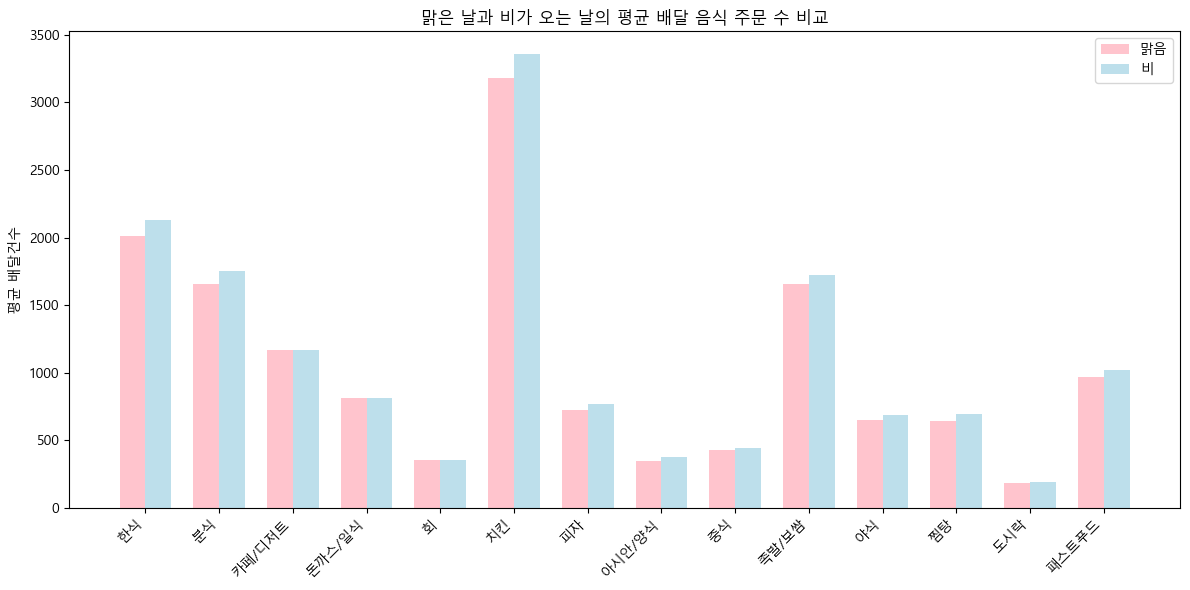

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 총_배달건수 제외한 데이터프레임
rain_daily_sum_df = {
    'index': ['한식', '분식', '카페/디저트', '돈까스/일식', '회',
              '치킨', '피자', '아시안/양식', '중식', '족발/보쌈',
              '야식', '찜탕', '도시락', '패스트푸드'],
    '평균_배달건수': [2130.06, 1755.36, 1166.98, 811.48, 353.006667, 3357.166667,
                   766.446667, 375.653333, 440.413333, 1720.86, 686.293333,
                   698.02, 191.693333, 1017.42]
}

no_rain_daily_sum_df = {
    'index': ['한식', '분식', '카페/디저트', '돈까스/일식', '회',
              '치킨', '피자', '아시안/양식', '중식', '족발/보쌈',
              '야식', '찜탕', '도시락', '패스트푸드'],
    '평균_배달건수': [2015.101626, 1654.065041, 1168.186992, 816.658537, 354.048780,
                   3178.451220, 726.288618, 350.487805, 428.032520, 1654.142276,
                   647.593496, 643.065041, 187.008130, 972.044715]
}

plt.rcParams['font.family'] = 'Malgun Gothic'
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(14)
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x, no_rain_daily_sum_df['평균_배달건수'], bar_width,
                alpha=opacity, color='lightpink', label='맑음')

rects2 = ax.bar(x + bar_width, rain_daily_sum_df['평균_배달건수'], bar_width,
                alpha=opacity, color='lightblue', label='비')

# Axis, labels, etc.
ax.set_ylabel('평균 배달건수')
ax.set_title('맑은 날과 비가 오는 날의 평균 배달 음식 주문 수 비교')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(rain_daily_sum_df['index'], rotation=45, ha='right')
ax.legend()

# y축 범위 설정

# Graph output
plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import ttest_ind

# "비가 오지 않은 날"의 일별 총 배달 건수 계산
no_rain_total = no_rain_data.groupby('날짜')['총_배달건수'].sum()

# "비가 온 날"의 일별 총 배달 건수 계산
rain_total = rain_data.groupby('날짜')['총_배달건수'].sum()

# 두 그룹 간의 t-검정 수행
t_stat, p_value = ttest_ind(no_rain_total, rain_total)

# 결과 출력
print("T-검정 결과:")
print(f"  - T-통계량: {t_stat:.2f}")
print(f"  - P-value: {p_value:.4f}")


T-검정 결과:
  - T-통계량: -1.15
  - P-value: 0.2527
